<a href="https://colab.research.google.com/github/RickyF404/Tesi/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gdown

In [ ]:
LOF_real = pd.read_csv("/content/drive/MyDrive/LOF_real.csv")
LOF_fake = pd.read_csv("/content/drive/MyDrive/LOF_fake.csv")

DBSCAN_real = pd.read_csv("/content/drive/MyDrive/DBSCAN_real.csv")
DBSCAN_fake = pd.read_csv("/content/drive/MyDrive/DBSCAN_fake.csv")

PCA_real = pd.read_csv("/content/drive/MyDrive/PCA_real.csv")
PCA_fake = pd.read_csv("/content/drive/MyDrive/PCA_fake.csv")

IF_real = pd.read_csv("/content/drive/MyDrive/IF_real.csv")
IF_fake = pd.read_csv("/content/drive/MyDrive/IF_fake.csv")

SVM_real = pd.read_csv("/content/drive/MyDrive/SVM_real.csv")
SVM_fake = pd.read_csv("/content/drive/MyDrive/SVM_fake.csv")

CVAE_beta_1_real = pd.read_csv("/content/drive/MyDrive/CVAE_beta_1_real.csv")
CVAE_beta_1_fake = pd.read_csv("/content/drive/MyDrive/CVAE_beta_1_fake.csv")

CVAE_beta_001_real = pd.read_csv("/content/drive/MyDrive/CVAE_beta_001_real.csv")
CVAE_beta_001_fake = pd.read_csv("/content/drive/MyDrive/CVAE_beta_001_fake.csv")

VAE_no_temp_real = pd.read_csv("/content/drive/MyDrive/VAE_no_temp_real.csv")
VAE_no_temp_fake = pd.read_csv("/content/drive/MyDrive/VAE_no_temp_fake.csv")

VAE_temp_real = pd.read_csv("/content/drive/MyDrive/VAE_temp_real.csv")
VAE_temp_fake = pd.read_csv("/content/drive/MyDrive/VAE_temp_fake.csv")

AE_no_temp_real = pd.read_csv("/content/drive/MyDrive/AE_no_temp_real.csv")
AE_no_temp_fake = pd.read_csv("/content/drive/MyDrive/AE_no_temp_fake.csv")

AE_temp_real = pd.read_csv("/content/drive/MyDrive/AE_temp_real.csv")
AE_temp_fake = pd.read_csv("/content/drive/MyDrive/AE_temp_fake.csv")


# Correlazione tra frequenze e temperatura

In [ ]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

In [ ]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

In [ ]:
correlation = df_temp.corr(numeric_only = True)["temperatura"].drop("temperatura")
print(correlation)

Mode 1    0.146577
Mode 2    0.141312
Mode 3   -0.632878
Mode 4   -0.407598
Mode 5   -0.082415
Mode 6   -0.186660
Name: temperatura, dtype: float64


Grafico a punti

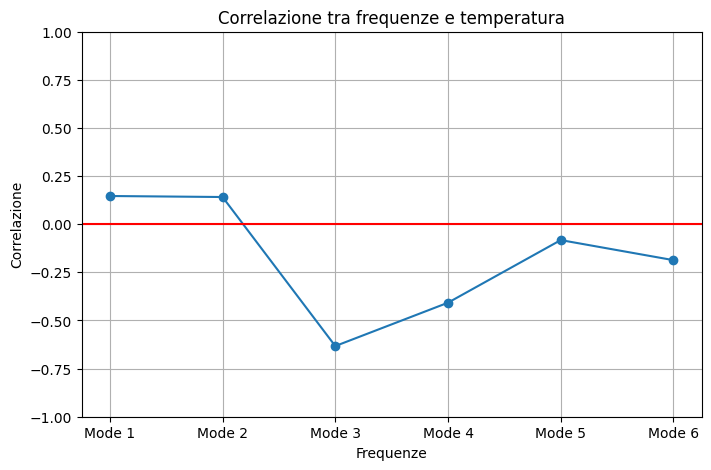

In [ ]:
freq = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
Y = np.linspace(-1, 1, 9)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(freq, correlation, "o-")
ax.set_xticks(freq)
ax.set_yticks(Y)
ax.axhline(0, color="red")
ax.set_title("Correlazione tra frequenze e temperatura")
ax.set_xlabel("Frequenze")
ax.set_ylabel("Correlazione")
ax.grid(True)
plt.show()

Grafico a barre

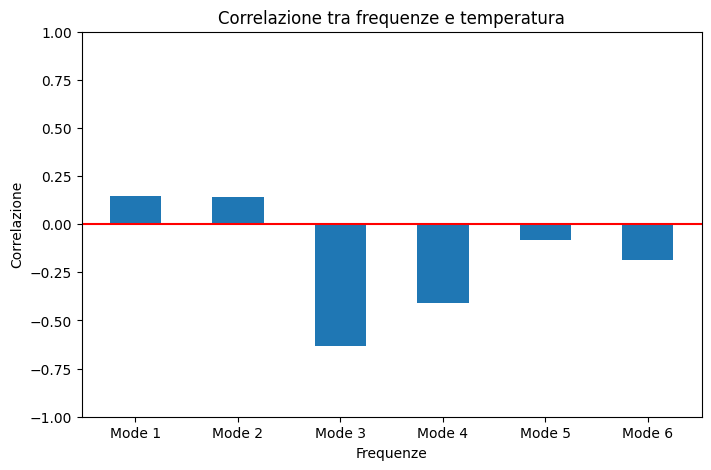

In [ ]:
plt.figure(figsize=(8,5))
plt.ylim(-1 , 1)
plt.bar(correlation.index, correlation.values, width=0.5)
plt.axhline(0, color="red")
plt.ylabel("Correlazione")
plt.xlabel("Frequenze")
plt.title("Correlazione tra frequenze e temperatura")
plt.show()

Heatmap

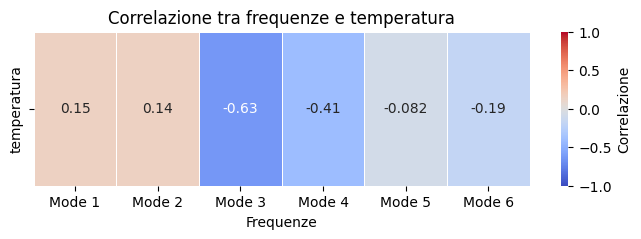

In [ ]:
correlation = df_temp.corr(numeric_only = True)[["temperatura"]].drop("temperatura")

plt.figure(figsize=(8,2))
sns.heatmap(
    correlation.T,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    linewidth=0.5,
    cbar_kws={"label": "Correlazione"}
)
plt.title("Correlazione tra frequenze e temperatura")
plt.xlabel("Frequenze")
plt.ylabel("")
plt.show()

# Grafico 1 (tutti i modelli, dati reali e falsi, 2/4/6 mesi)

Dati reali

In [ ]:
cvae_ridotto = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] != 1]
cvae_beta_1_ridotto = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] != 1]
VAE_no_temp_ridotto = VAE_no_temp_real[VAE_no_temp_real["window_size"] != 1]
VAE_temp_ridotto = VAE_temp_real[VAE_temp_real["window_size"] != 1]
AE_no_temp_ridotto = AE_no_temp_real[AE_no_temp_real["window_size"] != 1]
AE_temp_ridotto = AE_temp_real[AE_temp_real["window_size"] != 1]

real_mean_LOF = LOF_real.groupby("window_size")["anomaly rate 0.01"].mean()
real_mean_DBSCAN = DBSCAN_real.groupby("window_size")["anomaly rate"].mean()
real_mean_PCA = PCA_real.groupby("window_size")["anomaly rate"].mean()
real_mean_IF = IF_real.groupby("window_size")["anomaly rate"].mean()
real_mean_SVM = SVM_real.groupby("window_size")["anomaly rate"].mean()

real_mean_CVAE_beta_001 = cvae_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_CVAE_beta_1 = cvae_beta_1_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_VAE_no_temp = VAE_no_temp_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_VAE_temp = VAE_temp_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_no_temp = AE_no_temp_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_temp = AE_temp_ridotto.groupby("window_size")["anomaly rate"].mean()

real_std_LOF = LOF_real.groupby("window_size")["anomaly rate 0.01"].std()
real_std_DBSCAN = DBSCAN_real.groupby("window_size")["anomaly rate"].std()
real_std_PCA = PCA_real.groupby("window_size")["anomaly rate"].std()
real_std_IF = IF_real.groupby("window_size")["anomaly rate"].std()
real_std_SVM = SVM_real.groupby("window_size")["anomaly rate"].std()

real_std_CVAE_beta_001 = cvae_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_CVAE_beta_1 = cvae_beta_1_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_VAE_no_temp = VAE_no_temp_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_VAE_temp = VAE_temp_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_AE_no_temp = AE_no_temp_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_AE_temp = AE_temp_ridotto.groupby("window_size")["anomaly rate"].std()

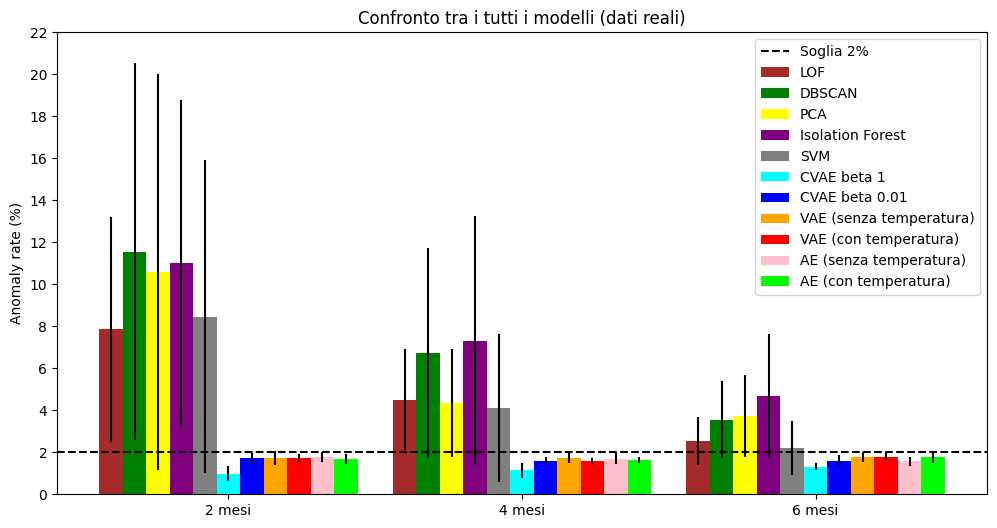

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 24, step=2)
fig, ax = plt.subplots(figsize=(12, 6))
w = 0.08
ax.bar(x-5*w, real_mean_LOF.values*100, width=w, yerr=real_std_LOF*100, color="brown", label="LOF")
ax.bar(x-4*w, real_mean_DBSCAN.values*100, width=w, yerr=real_std_DBSCAN*100, color="green", label="DBSCAN")
ax.bar(x-3*w, real_mean_PCA.values*100, width=w, yerr=real_std_PCA*100, color="yellow", label="PCA")
ax.bar(x-2*w, real_mean_IF.values*100, width=w, yerr=real_std_IF*100, color="purple", label="Isolation Forest")
ax.bar(x-w, real_mean_SVM.values*100, width=w, yerr=real_std_SVM*100, color="gray", label="SVM")
ax.bar(x, real_mean_CVAE_beta_1.values*100, width=w, yerr=real_std_CVAE_beta_1*100, color="aqua", label="CVAE beta 1")
ax.bar(x+w, real_mean_CVAE_beta_001.values*100, width=w, yerr=real_std_CVAE_beta_001*100, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, real_mean_VAE_no_temp.values*100, width=w, yerr=real_std_VAE_no_temp*100, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, real_mean_VAE_temp.values*100, width=w, yerr=real_std_VAE_temp*100, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, real_mean_AE_no_temp.values*100, width=w, yerr=real_std_AE_no_temp*100, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, real_mean_AE_temp.values*100, width=w, yerr=real_std_AE_temp*100, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (dati reali)")
plt.legend()
plt.show()

Solo modelli deep

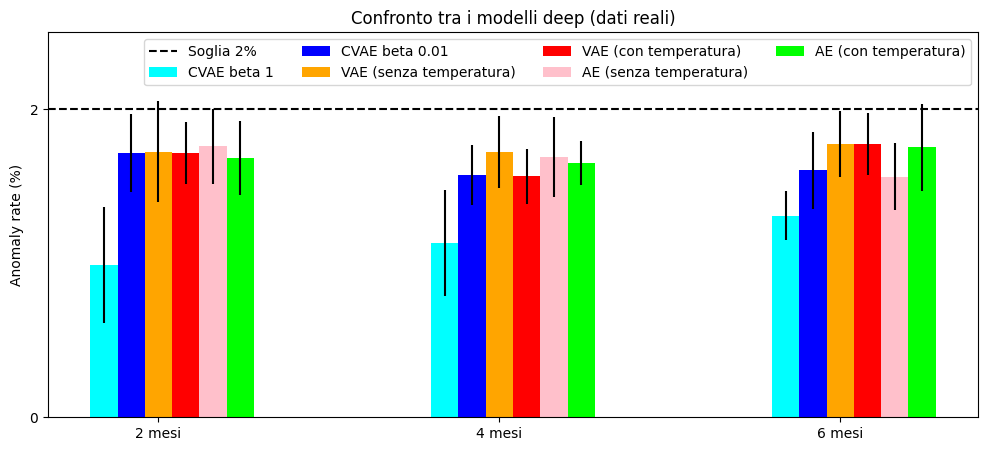

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 8, step=2)
fig, ax = plt.subplots(figsize=(12, 5))
w = 0.08
# ax.set_ylim(0.02)


ax.bar(x-2*w, real_mean_CVAE_beta_1.values*100, width=w, yerr=real_std_CVAE_beta_1*100, color="aqua", label="CVAE beta 1")
ax.bar(x-w, real_mean_CVAE_beta_001.values*100, width=w, yerr=real_std_CVAE_beta_001*100, color="blue", label="CVAE beta 0.01")
ax.bar(x, real_mean_VAE_no_temp.values*100, width=w, yerr=real_std_VAE_no_temp*100, color="orange", label="VAE (senza temperatura)")
ax.bar(x+w, real_mean_VAE_temp.values*100, width=w, yerr=real_std_VAE_temp*100, color="red", label="VAE (con temperatura)")
ax.bar(x+2*w, real_mean_AE_no_temp.values*100, width=w, yerr=real_std_AE_no_temp*100, color="pink", label="AE (senza temperatura)")
ax.bar(x+3*w, real_mean_AE_temp.values*100, width=w, yerr=real_std_AE_temp*100, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i modelli deep (dati reali)")
plt.legend(ncol=4)
plt.ylim(0, 2.5)
plt.show()

Dati falsi

In [ ]:
cvae_ridotto_fake = CVAE_beta_001_fake[CVAE_beta_001_fake["window_size"] != 1]
cvae_beta_1_ridotto_fake = CVAE_beta_1_fake[CVAE_beta_1_fake["window_size"] != 1]
VAE_no_temp_ridotto_fake = VAE_no_temp_fake[VAE_no_temp_fake["window_size"] != 1]
VAE_temp_ridotto_fake = VAE_temp_fake[VAE_temp_fake["window_size"] != 1]
AE_no_temp_ridotto_fake = AE_no_temp_fake[AE_no_temp_fake["window_size"] != 1]
AE_temp_ridotto_fake = AE_temp_fake[AE_temp_fake["window_size"] != 1]

fake_mean_LOF = LOF_fake.groupby("window_size")["anomaly"].mean()
fake_mean_DBSCAN = DBSCAN_fake.groupby("window_size")["anomaly"].mean()
fake_mean_PCA = PCA_fake.groupby("window_size")["anomaly"].mean()
fake_mean_IF = IF_fake.groupby("window_size")["anomaly"].mean()
fake_mean_SVM = SVM_fake.groupby("window_size")["anomaly"].mean()

fake_mean_CVAE_beta_001 = cvae_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_CVAE_beta_1 = cvae_beta_1_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_VAE_no_temp = VAE_no_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_VAE_temp = VAE_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_AE_no_temp = AE_no_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_AE_temp = AE_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()

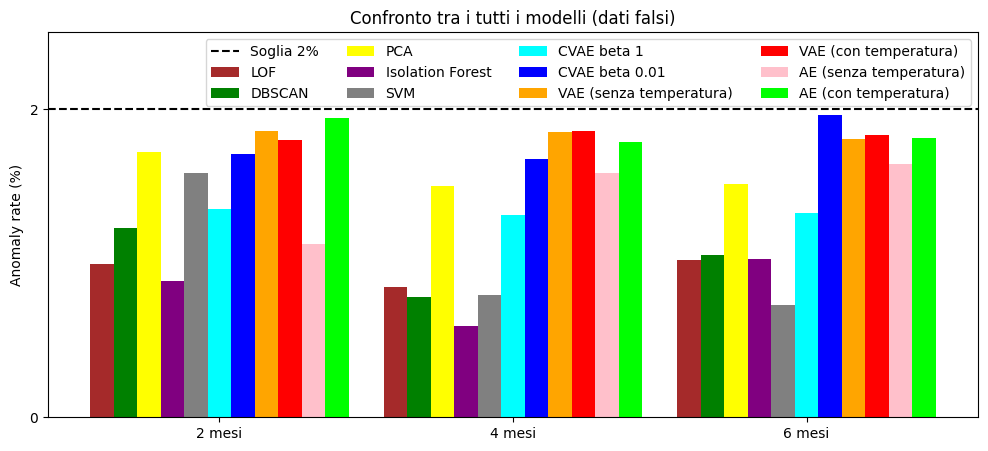

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 10, step=2)
fig, ax = plt.subplots(figsize=(12, 5))
w = 0.08
ax.bar(x-5*w, fake_mean_LOF.values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, fake_mean_DBSCAN.values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, fake_mean_PCA.values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, fake_mean_IF.values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, fake_mean_SVM.values*100, width=w, color="gray", label="SVM")
ax.bar(x, fake_mean_CVAE_beta_1.values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, fake_mean_CVAE_beta_001.values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, fake_mean_VAE_no_temp.values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, fake_mean_VAE_temp.values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, fake_mean_AE_no_temp.values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, fake_mean_AE_temp.values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (dati falsi)")
plt.legend(ncol = 4)
plt.ylim(0, 2.5)
plt.show()

# Grafico 2 (tutti i modelli, dati reali, 2 mesi)

In [ ]:
LOF_2m = LOF_real[LOF_real["window_size"] == 2]
DBSCAN_2m = DBSCAN_real[DBSCAN_real["window_size"] == 2]
PCA_2m = PCA_real[PCA_real["window_size"] == 2]
IF_2m = IF_real[IF_real["window_size"] == 2]
SVM_2m = SVM_real[SVM_real["window_size"] == 2]
cvae_2m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 2]
cvae_beta1_2m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 2]
VAE_no_temp_2m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 2]
VAE_temp_2m = VAE_temp_real[VAE_temp_real["window_size"] == 2]
AE_no_temp_2m = AE_no_temp_real[AE_no_temp_real["window_size"] == 2]
AE_temp_2m = AE_temp_real[AE_temp_real["window_size"] == 2]

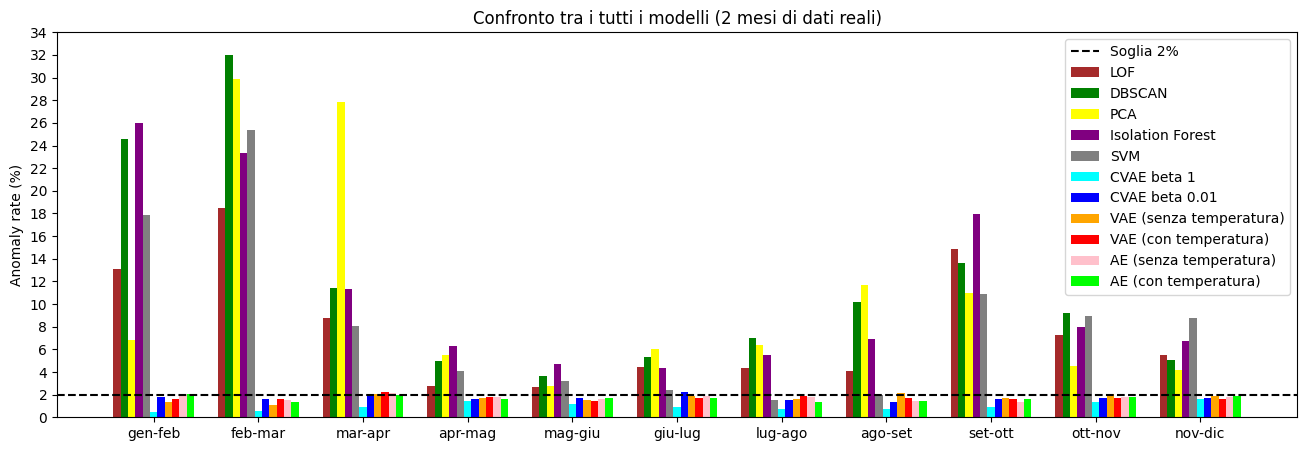

In [ ]:
labels = ["gen-feb", "feb-mar", "mar-apr", "apr-mag", "mag-giu", "giu-lug", "lug-ago", "ago-set", "set-ott", "ott-nov", "nov-dic"]
x = np.arange(len(labels))
y = np.arange(0, 36, step=2)
fig, ax = plt.subplots(figsize=(16, 5))
w = 0.07
ax.bar(x-5*w, LOF_2m["anomaly rate 0.01"].values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, DBSCAN_2m["anomaly rate"].values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, PCA_2m["anomaly rate"].values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, IF_2m["anomaly rate"].values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, SVM_2m["anomaly rate"].values*100, width=w, color="gray", label="SVM")
ax.bar(x, cvae_beta1_2m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, cvae_2m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, VAE_no_temp_2m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, VAE_temp_2m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, AE_no_temp_2m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, AE_temp_2m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (2 mesi di dati reali)")
plt.legend()
plt.show()

# Grafico 3 (tutti i modelli, dati reali, 4 mesi)

In [ ]:
LOF_4m = LOF_real[LOF_real["window_size"] == 4]
DBSCAN_4m = DBSCAN_real[DBSCAN_real["window_size"] == 4]
PCA_4m = PCA_real[PCA_real["window_size"] == 4]
IF_4m = IF_real[IF_real["window_size"] == 4]
SVM_4m = SVM_real[SVM_real["window_size"] == 4]
cvae_4m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 4]
cvae_beta1_4m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 4]
VAE_no_temp_4m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 4]
VAE_temp_4m = VAE_temp_real[VAE_temp_real["window_size"] == 4]
AE_no_temp_4m = AE_no_temp_real[AE_no_temp_real["window_size"] == 4]
AE_temp_4m = AE_temp_real[AE_temp_real["window_size"] == 4]

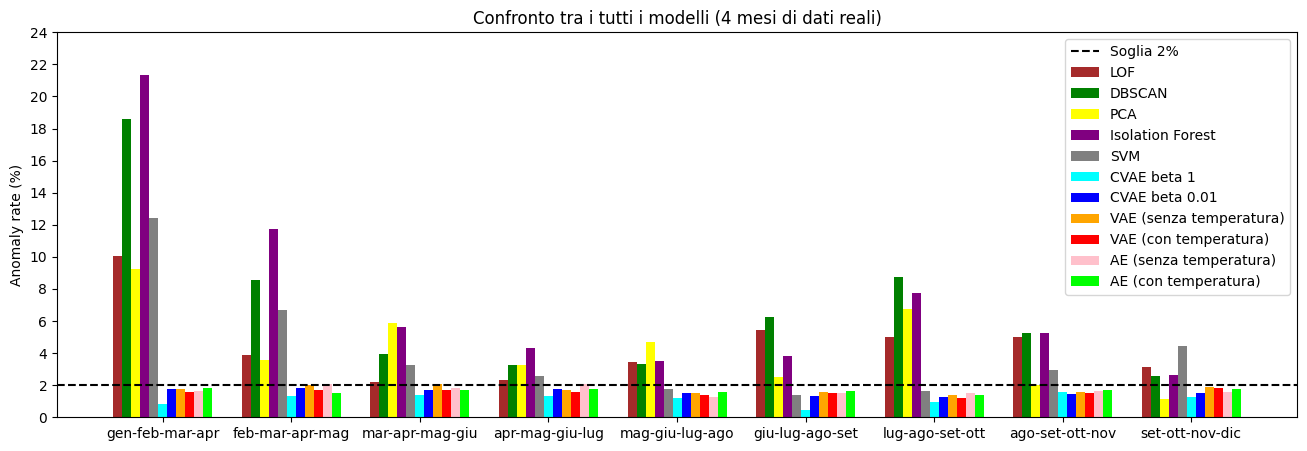

In [ ]:
labels = ["gen-feb-mar-apr", "feb-mar-apr-mag", "mar-apr-mag-giu", "apr-mag-giu-lug", "mag-giu-lug-ago", "giu-lug-ago-set", "lug-ago-set-ott", "ago-set-ott-nov", "set-ott-nov-dic"]
x = np.arange(len(labels))
y = np.arange(0, 26, step=2)
fig, ax = plt.subplots(figsize=(16, 5))
w = 0.07
ax.bar(x-5*w, LOF_4m["anomaly rate 0.01"].values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, DBSCAN_4m["anomaly rate"].values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, PCA_4m["anomaly rate"].values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, IF_4m["anomaly rate"].values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, SVM_4m["anomaly rate"].values*100, width=w, color="gray", label="SVM")
ax.bar(x, cvae_beta1_4m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, cvae_4m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, VAE_no_temp_4m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, VAE_temp_4m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, AE_no_temp_4m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, AE_temp_4m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (4 mesi di dati reali)")
plt.legend()
plt.show()

# Grafico 4 (tutti i modelli, dati reali, 6 mesi)

In [ ]:
LOF_6m = LOF_real[LOF_real["window_size"] == 6]
DBSCAN_6m = DBSCAN_real[DBSCAN_real["window_size"] == 6]
PCA_6m = PCA_real[PCA_real["window_size"] == 6]
IF_6m = IF_real[IF_real["window_size"] == 6]
SVM_6m = SVM_real[SVM_real["window_size"] == 6]
cvae_6m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 6]
cvae_beta1_6m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 6]
VAE_no_temp_6m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 6]
VAE_temp_6m = VAE_temp_real[VAE_temp_real["window_size"] == 6]
AE_no_temp_6m = AE_no_temp_real[AE_no_temp_real["window_size"] == 6]
AE_temp_6m = AE_temp_real[AE_temp_real["window_size"] == 6]

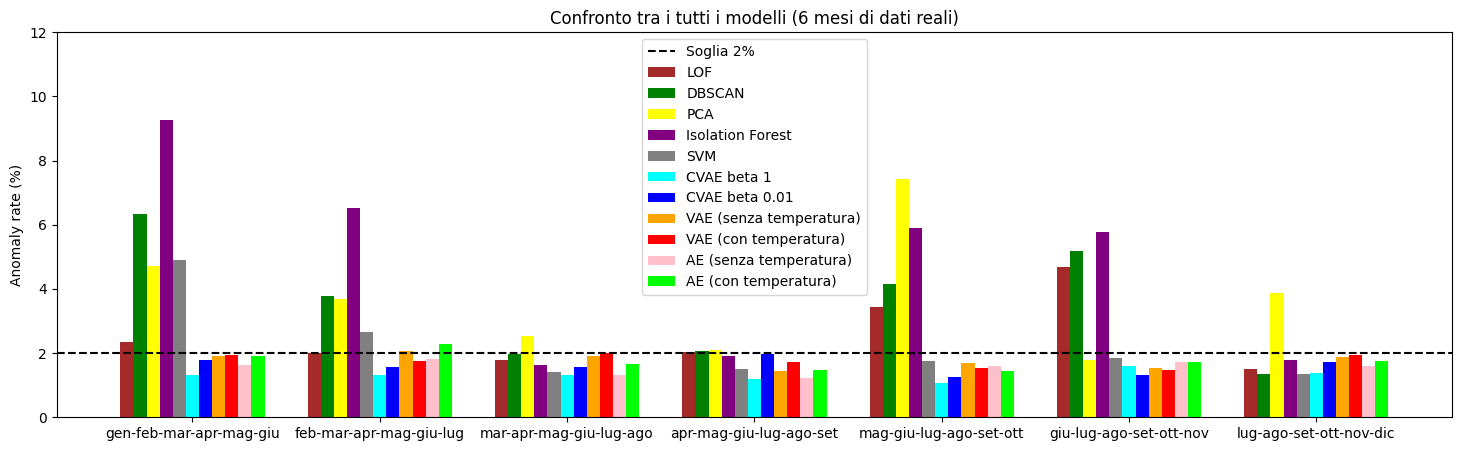

In [ ]:
labels = ["gen-feb-mar-apr-mag-giu", "feb-mar-apr-mag-giu-lug", "mar-apr-mag-giu-lug-ago", "apr-mag-giu-lug-ago-set", "mag-giu-lug-ago-set-ott", "giu-lug-ago-set-ott-nov", "lug-ago-set-ott-nov-dic"]
x = np.arange(len(labels))
y = np.arange(0, 14, step=2)
fig, ax = plt.subplots(figsize=(18, 5))
w = 0.07
ax.bar(x-5*w, LOF_6m["anomaly rate 0.01"].values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, DBSCAN_6m["anomaly rate"].values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, PCA_6m["anomaly rate"].values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, IF_6m["anomaly rate"].values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, SVM_6m["anomaly rate"].values*100, width=w, color="gray", label="SVM")
ax.bar(x, cvae_beta1_6m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, cvae_6m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, VAE_no_temp_6m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, VAE_temp_6m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, AE_no_temp_6m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, AE_temp_6m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (6 mesi di dati reali)")
plt.legend()
plt.show()

# Grafico 5 (solo i modelli deep, dati reali, 1 mese)

In [ ]:
cvae_beta_1_1m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 1]
cvae_beta_001_1m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 1]
VAE_no_temp_1m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 1]
VAE_temp_1m = VAE_temp_real[VAE_temp_real["window_size"] == 1]
AE_no_temp_1m = AE_no_temp_real[AE_no_temp_real["window_size"] == 1]
AE_temp_1m = AE_temp_real[AE_temp_real["window_size"] == 1]

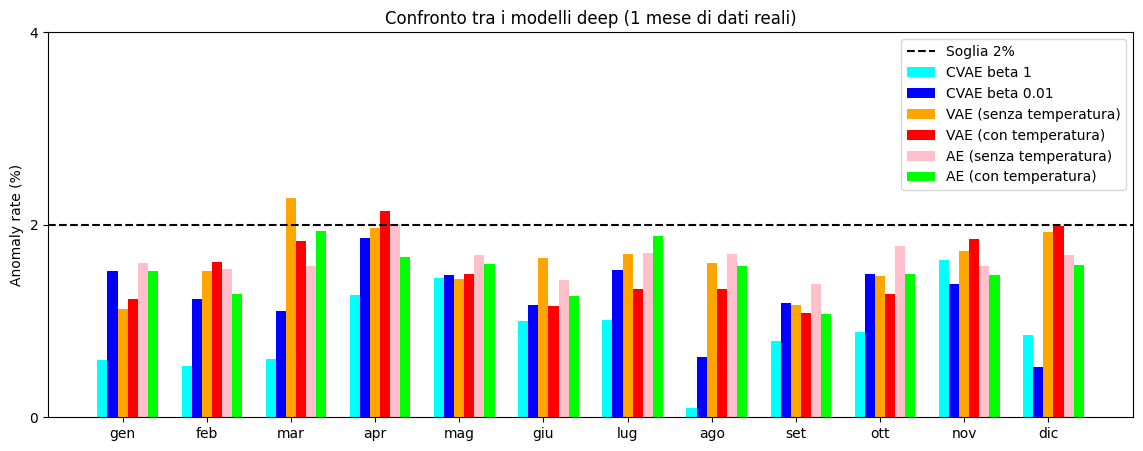

In [ ]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
x = np.arange(len(labels))
y = np.arange(0, 6, step=2)
fig, ax = plt.subplots(figsize=(14, 5))
w = 0.12

ax.bar(x-2*w, cvae_beta_1_1m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x-w, cvae_beta_001_1m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x, VAE_no_temp_1m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+w, VAE_temp_1m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+2*w, AE_no_temp_1m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+3*w, AE_temp_1m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i modelli deep (1 mese di dati reali)")
plt.legend()
plt.show()

# Confronto tra CVAE beta 1 e CVAE beta 0.01 (dati reali e falsi)

In [ ]:
real_mean_CVAE_beta_001_full = CVAE_beta_001_real.groupby("window_size")["anomaly rate"].mean()
real_mean_CVAE_beta_1_full = CVAE_beta_1_real.groupby("window_size")["anomaly rate"].mean()

real_std_CVAE_beta_001_full = CVAE_beta_001_real.groupby("window_size")["anomaly rate"].std()
real_std_CVAE_beta_1_full = CVAE_beta_1_real.groupby("window_size")["anomaly rate"].std()

Dati reali

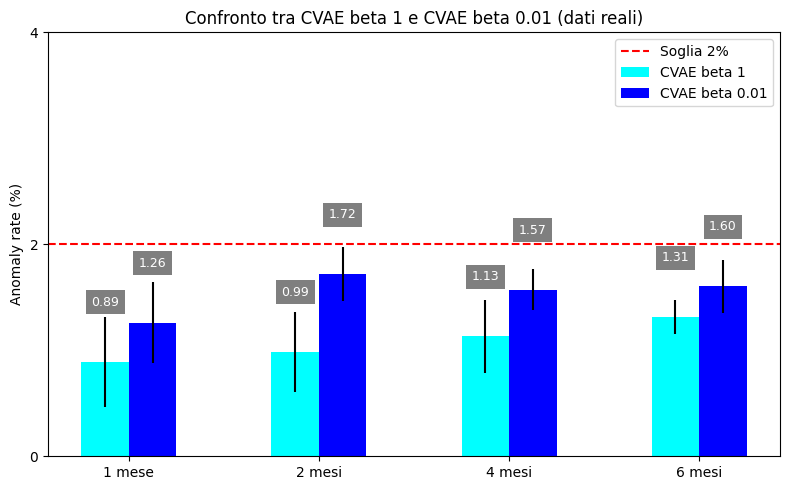

In [ ]:
labels = ["1 mese", "2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 6, step=2)
fig, ax = plt.subplots(figsize=(8, 5))
w = 0.25

bars1 = ax.bar(x-w/2, real_mean_CVAE_beta_1_full.values*100, width=w, yerr=real_std_CVAE_beta_1_full*100, color="aqua", label="CVAE beta 1")
bars2 = ax.bar(x+w/2, real_mean_CVAE_beta_001_full.values*100, width=w, yerr=real_std_CVAE_beta_001_full*100, color="blue", label="CVAE beta 0.01")

ax.axhline(2, color="red", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra CVAE beta 1 e CVAE beta 0.01 (dati reali)")
plt.legend()

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

Dati falsi

In [ ]:
fake_mean_CVAE_beta_001_full = CVAE_beta_001_fake.groupby("window_size")["anomaly"].mean()
fake_mean_CVAE_beta_1_full = CVAE_beta_1_fake.groupby("window_size")["anomaly"].mean()

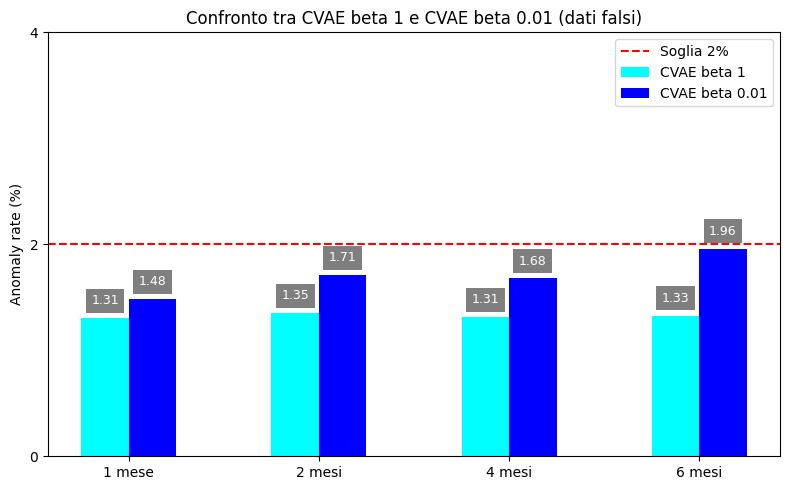

In [ ]:
labels = ["1 mese", "2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 6, step=2)
fig, ax = plt.subplots(figsize=(8, 5))
w = 0.25

bars1 = ax.bar(x-w/2, fake_mean_CVAE_beta_1_full.values*100, width=w, color="aqua", label="CVAE beta 1")
bars2 = ax.bar(x+w/2, fake_mean_CVAE_beta_001_full.values*100, width=w, color="blue", label="CVAE beta 0.01")

ax.axhline(2, color="red", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra CVAE beta 1 e CVAE beta 0.01 (dati falsi)")
plt.legend()

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.1,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

# Analisi temperatura mensile

Temperatura media, mediana, massima e minima

In [2]:
url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 109MB/s]


'data_temperature.csv'

In [33]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

end_date = "2025-01-01"
df = df_temp[df_temp["timestamp"] < end_date]

temp_avg = df.groupby(df["timestamp"].dt.month)["temperatura"].mean()
temp_max = df.groupby(df["timestamp"].dt.month)["temperatura"].max()
temp_min = df.groupby(df["timestamp"].dt.month)["temperatura"].min()
temp_median = df.groupby(df["timestamp"].dt.month)["temperatura"].median()
print("temperatura media:", temp_avg, "\n")
print("temperatura massima:", temp_max, "\n")
print("temperatura minima:", temp_min, "\n")
print("temperatura mediana:", temp_median, "\n")

temperatura media: timestamp
1     12.126282
2     13.292488
3     15.238918
4     18.606741
5     22.074594
6     26.871295
7     31.509580
8     32.167576
9     25.252816
10    21.480224
11    15.853651
12    11.501519
Name: temperatura, dtype: float64 

temperatura massima: timestamp
1     18.603085
2     19.029917
3     23.671121
4     27.771809
5     29.598025
6     35.989617
7     38.777520
8     39.536632
9     34.927588
10    26.127871
11    23.024952
12    16.135025
Name: temperatura, dtype: float64 

temperatura minima: timestamp
1      6.980165
2      7.921371
3      9.878445
4     11.754597
5     14.985103
6     19.985833
7     24.504193
8     26.384351
9     18.876069
10    17.397043
11     8.412779
12     7.699968
Name: temperatura, dtype: float64 

temperatura mediana: timestamp
1     11.996201
2     13.039039
3     15.132782
4     18.192804
5     21.913757
6     26.510781
7     31.127388
8     31.721994
9     24.840656
10    21.296100
11    16.004572
12    11.453745
Nam

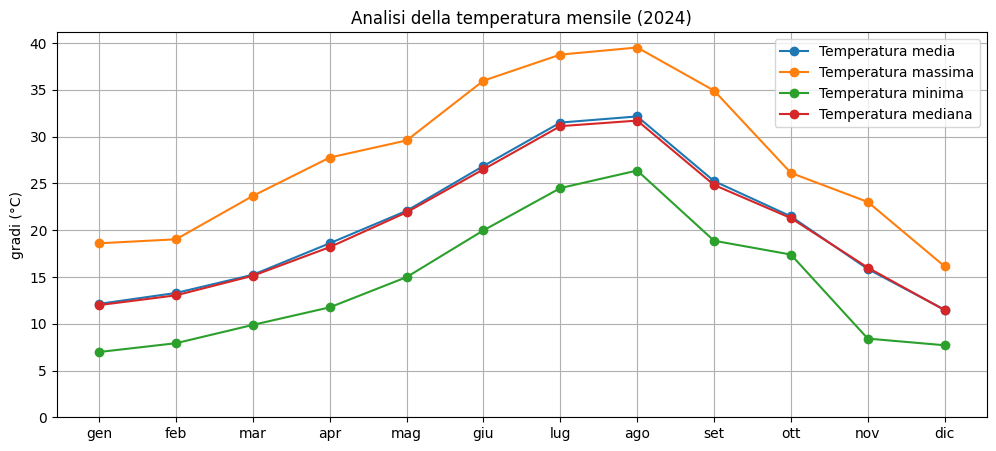

In [38]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 45, step=5)
x = np.arange(1, len(labels)+1)

figure, ax = plt.subplots(figsize=(12, 5))
ax.plot(temp_avg.index, temp_avg.values, "o-", label="Temperatura media")
ax.plot(temp_max.index, temp_max.values, "o-", label="Temperatura massima")
ax.plot(temp_min.index, temp_min.values, "o-", label="Temperatura minima")
ax.plot(temp_median.index, temp_median.values, "o-", label="Temperatura mediana")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.legend()
plt.title("Analisi della temperatura mensile (2024)")
plt.grid(True)
plt.show()

Media delle escursioni termiche giornaliere

In [6]:
daily_amp = df.groupby(df["timestamp"].dt.date)["temperatura"].agg(lambda x: x.max()- x.min())

monthly_amp_mean = daily_amp.groupby(pd.to_datetime(daily_amp.index).to_period("M")).mean()

print(monthly_amp_mean)

timestamp
2024-01    4.087587
2024-02    5.145328
2024-03    5.137622
2024-04    6.739853
2024-05    6.228330
2024-06    6.726246
2024-07    7.300671
2024-08    7.355684
2024-09    5.781298
2024-10    4.820280
2024-11    4.619887
2024-12    4.026756
Freq: M, Name: temperatura, dtype: float64


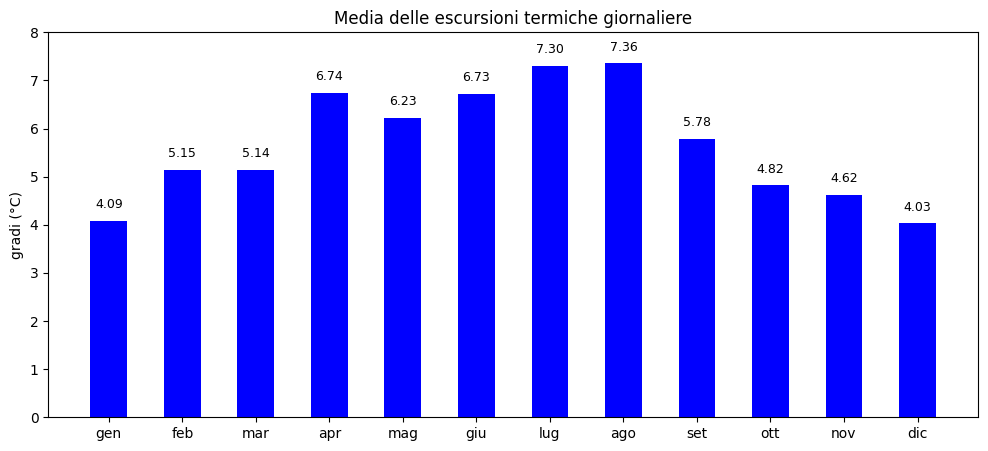

In [41]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 9)
x = np.arange(len(labels))

figure, ax = plt.subplots(figsize=(12, 5))
bars1 = ax.bar(labels, monthly_amp_mean, width=0.5, color="blue")
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.title("Media delle escursioni termiche giornaliere")

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.2,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )

add_labels(bars1)
plt.show()

Escursioni termiche mensili

In [31]:
m_amp = df.groupby(df["timestamp"].dt.month)["temperatura"].agg(lambda x: x.max() - x.min())
print(m_amp)

timestamp
1     11.622921
2     11.108546
3     13.792676
4     16.017212
5     14.612922
6     16.003784
7     14.273327
8     13.152282
9     16.051519
10     8.730828
11    14.612173
12     8.435057
Name: temperatura, dtype: float64


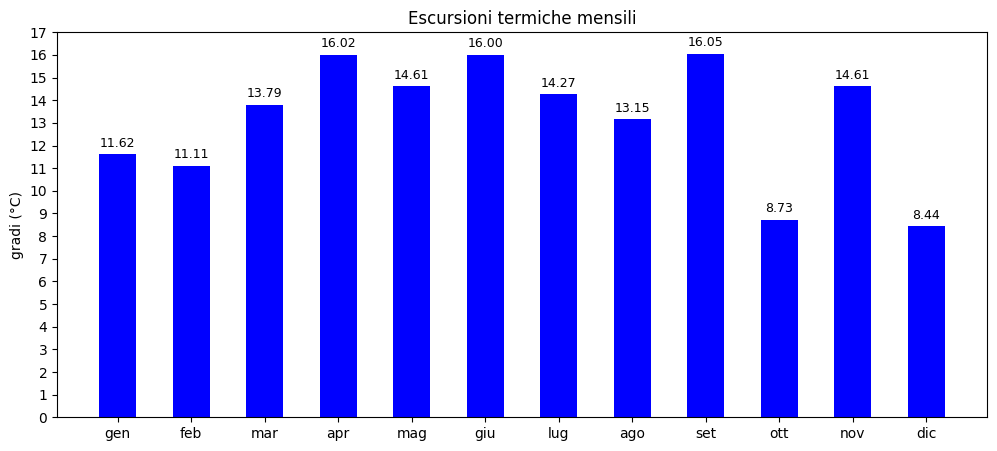

In [40]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 18)
x = np.arange(len(labels))

figure, ax = plt.subplots(figsize=(12, 5))
bars1 = ax.bar(labels, m_amp, width=0.5, color="blue")
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.title("Escursioni termiche mensili")

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.2,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )

add_labels(bars1)
plt.show()

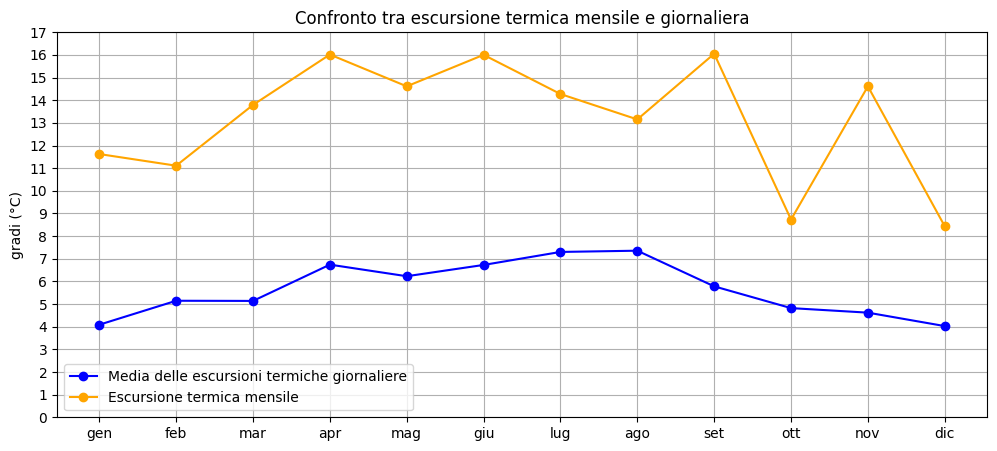

In [46]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 18)
x = np.arange(len(labels))

figure, ax = plt.subplots(figsize=(12, 5))
ax.plot(labels, monthly_amp_mean, "o-", label="Media delle escursioni termiche giornaliere", color="blue")
ax.plot(labels, m_amp, "o-", label="Escursione termica mensile", color="orange")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.legend()
plt.title("Confronto tra escursione termica mensile e giornaliera")
plt.grid(True)
plt.legend()
plt.show()